In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import astropy

In [2]:
#from platform import python_version
#python_version()

In [3]:
import os
directory_path = os.getcwd()
nome_aglo = directory_path.split('/')[-1]
nome_aglo

'Berkeley_23'

In [4]:
df = pd.read_csv('../../lista.txt', comment= '#')
ra, dec = df.loc[df['Nome'] == nome_aglo]['_RAJ2000'].values[0], df.loc[df['Nome'] == nome_aglo]['_DEJ2000'].values[0]
ra, dec

(98.30833, 20.53056)

In [5]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [6]:
meta = Gaia.load_table('gaiadr3.gaia_source')
meta

Retrieving table 'gaiadr3.gaia_source'


In [7]:
query = """SELECT 
ra, dec, pmra, pmra_error, pmdec, pmdec_error, bp_rp, phot_g_mean_mag, parallax, parallax_error, radial_velocity, radial_velocity_error, l,b
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(POINT('ICRS',ra,dec),
CIRCLE('ICRS', """ +  str(ra) + ',' + str(dec) + ',' + ' 0.2))'
query

"SELECT \nra, dec, pmra, pmra_error, pmdec, pmdec_error, bp_rp, phot_g_mean_mag, parallax, parallax_error, radial_velocity, radial_velocity_error, l,b\nFROM gaiadr3.gaia_source\nWHERE 1=CONTAINS(POINT('ICRS',ra,dec),\nCIRCLE('ICRS', 98.30833,20.53056, 0.2))"

In [8]:
job = Gaia.launch_job_async(query)
job

INFO: Query finished. [astroquery.utils.tap.core]


In [9]:
data = job.get_results()

In [10]:
len(data)

5423

In [11]:
data = job.get_results()

In [12]:
data#.show_in_notebook()

ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
deg,deg,mas / yr,mas / yr,mas / yr,mas / yr,mag,mag,mas,mas,km / s,km / s,deg,deg
float64,float64,float64,float32,float64,float32,float32,float32,float64,float32,float32,float32,float64,float64
98.3519753646501,20.33489212562049,-0.38856999778109336,0.17354362,-1.3659088749018151,0.12271239,1.4523678,17.887228,0.41736182757172874,0.14571296,--,--,192.78873138686419,5.328889923425866
98.35396630489257,20.33875391925055,1.4405068937426817,0.27461368,-0.6304284757947524,0.2034049,1.2074089,18.659582,0.2795127704139192,0.24347599,--,--,192.78612613133595,5.332306025423972
98.35005464165842,20.34186248269788,0.8599048006219591,0.025661808,-2.641192928067422,0.020173289,0.67087746,14.261889,0.5850682941168022,0.024479946,--,--,192.78167233294792,5.330448475713683
98.40508471928254,20.35254997549366,0.5393762600078092,0.35251927,0.1211987557512413,0.246421,1.1981354,18.868177,-0.16207688414666688,0.43745655,--,--,192.79561797168557,5.381277795666628
98.41149568652337,20.359127818776102,2.152265423386537,0.3700105,-1.1332864108910055,0.2630286,2.150219,18.876717,0.3982967438067359,0.35393482,--,--,192.79246767088588,5.389617964664992
98.41493338052611,20.359483505848377,1.3847377108276624,0.15908511,-0.43032368681693584,0.1148056,1.1229782,17.652752,0.13824443934432543,0.13457525,--,--,192.79361737908457,5.392651722747021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98.20366858027798,20.695968054075458,0.20211844563160286,0.08243584,0.3748527236946139,0.057633728,1.0146589,16.622982,0.37112875522970395,0.08702088,--,--,192.40226639932413,5.3690388656294585


In [13]:
df = data.to_pandas()
df

,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
0,98.351975,20.334892,-0.388570,0.173544,-1.365909,0.122712,1.452368,17.887228,0.417362,0.145713,NaN,NaN,192.788731,5.328890
1,98.353966,20.338754,1.440507,0.274614,-0.630428,0.203405,1.207409,18.659582,0.279513,0.243476,NaN,NaN,192.786126,5.332306
2,98.350055,20.341862,0.859905,0.025662,-2.641193,0.020173,0.670877,14.261889,0.585068,0.024480,NaN,NaN,192.781672,5.330448
3,98.405085,20.352550,0.539376,0.352519,0.121199,0.246421,1.198135,18.868177,-0.162077,0.437457,NaN,NaN,192.795618,5.381278
4,98.411496,20.359128,2.152265,0.370010,-1.133286,0.263029,2.150219,18.876717,0.398297,0.353935,NaN,NaN,192.792468,5.389618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,98.184966,20.692697,2.975033,0.208251,-11.247463,0.146478,2.062077,17.850275,0.875432,0.192684,NaN,NaN,192.397213,5.351966
5419,98.221180,20.706179,-1.562716,0.451955,-0.034837,0.308418,1.418013,19.360909,-0.369101,0.515362,NaN,NaN,192.400599,5.388270
5420,98.215930,20.708025,-0.007647,1.268508,-15.037385,1.060649,2.526632,20.269272,-0.316666,1.162772,NaN,NaN,192.396707,5.384733
5421,98.219354,20.708875,0.949584,0.476781,0.013241,0.330522,1.625120,19.486835,0.678473,0.576026,NaN,NaN,192.397407,5.387972


In [14]:
ndf = df.dropna(how='any',subset=['pmra', 'pmdec', 'parallax'])
ndf

,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
0,98.351975,20.334892,-0.388570,0.173544,-1.365909,0.122712,1.452368,17.887228,0.417362,0.145713,NaN,NaN,192.788731,5.328890
1,98.353966,20.338754,1.440507,0.274614,-0.630428,0.203405,1.207409,18.659582,0.279513,0.243476,NaN,NaN,192.786126,5.332306
2,98.350055,20.341862,0.859905,0.025662,-2.641193,0.020173,0.670877,14.261889,0.585068,0.024480,NaN,NaN,192.781672,5.330448
3,98.405085,20.352550,0.539376,0.352519,0.121199,0.246421,1.198135,18.868177,-0.162077,0.437457,NaN,NaN,192.795618,5.381278
4,98.411496,20.359128,2.152265,0.370010,-1.133286,0.263029,2.150219,18.876717,0.398297,0.353935,NaN,NaN,192.792468,5.389618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,98.184966,20.692697,2.975033,0.208251,-11.247463,0.146478,2.062077,17.850275,0.875432,0.192684,NaN,NaN,192.397213,5.351966
5419,98.221180,20.706179,-1.562716,0.451955,-0.034837,0.308418,1.418013,19.360909,-0.369101,0.515362,NaN,NaN,192.400599,5.388270
5420,98.215930,20.708025,-0.007647,1.268508,-15.037385,1.060649,2.526632,20.269272,-0.316666,1.162772,NaN,NaN,192.396707,5.384733
5421,98.219354,20.708875,0.949584,0.476781,0.013241,0.330522,1.625120,19.486835,0.678473,0.576026,NaN,NaN,192.397407,5.387972


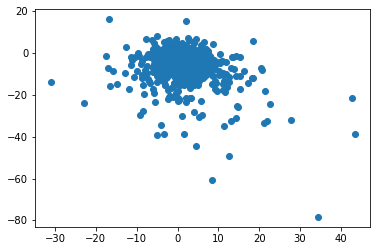

In [15]:
plt.scatter(ndf['pmra'],ndf['pmdec'])

In [16]:
x = ndf['pmra']
y = ndf['pmdec']

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.preprocessing import StandardScaler

In [18]:
X = np.dstack((ndf['pmra'],ndf['pmdec']))[0]
jpt = np.dstack((ndf['pmra'],ndf['pmdec'],ndf['b'],ndf['l'],ndf['parallax']))[0]
#X = StandardScaler().fit_transform(Xis)

0.20864083386376095


<Figure size 360x360 with 0 Axes>

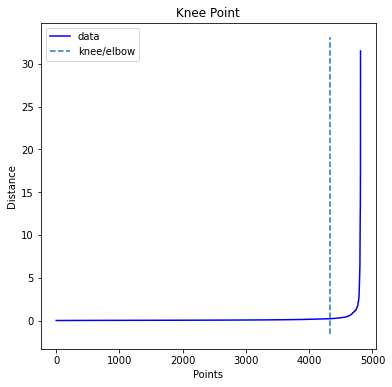

In [19]:
from sklearn.neighbors import NearestNeighbors
vizinhos = np.sqrt(len(data)).astype(int)
nn = NearestNeighbors(n_neighbors=vizinhos).fit(X)
distances, indices = nn.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")


eps_opt = distances[knee.knee]
nmin = int(0.005*len(data))
print(distances[knee.knee])

Estimated no. of clusters: 1
Estimated no. of noise points: 4548
Estimated no. points clustered: 264


Text(0, 0.5, '$x_2$')

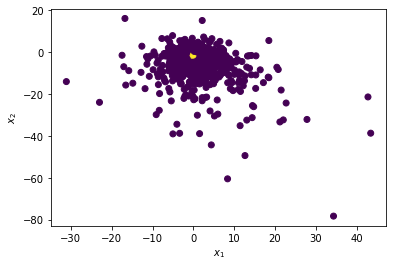

In [20]:
jpt = np.dstack((ndf['pmra'],ndf['pmdec'],ndf['b'],ndf['l'],ndf['parallax']))[0]
db = DBSCAN(eps=eps_opt, min_samples=nmin).fit(jpt)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(db.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

n_in = list(db.labels_).count(0)
print('Estimated no. points clustered: %d' % n_in)

plt.scatter(X[:, 0], 
            X[:, 1], 
            c=db.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

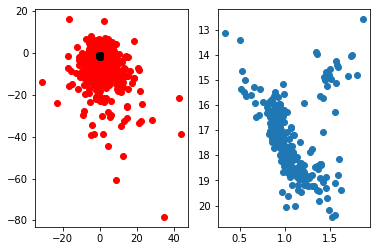

In [21]:
pontos_cluster = np.empty((0,2))
for i in range(len(X)):
    if labels[i]==0:
        pontos_cluster = np.append(pontos_cluster, np.array([X[i]]), axis  = 0) #problema no formato do array para dar append
    else:
        continue

xin,yin = pontos_cluster.T

pontos_cluster = np.empty((0,2))
for i in range(len(X)):
    if labels[i]==-1:
        pontos_cluster = np.append(pontos_cluster, np.array([X[i]]), axis  = 0) #problema no formato do array para dar append
    else:
        continue


xout, yout = pontos_cluster.T


fig, ax = plt.subplots(1,2)
ax[0].scatter(xin,yin, color = 'k', zorder = 100)
ax[0].scatter(xout,yout, color = 'red')

len(xin), len(xout)

subset = ndf[ndf['pmra'].isin(xin) & ndf['pmdec'].isin(yin)]

ax[1].scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
plt.gca().invert_yaxis()

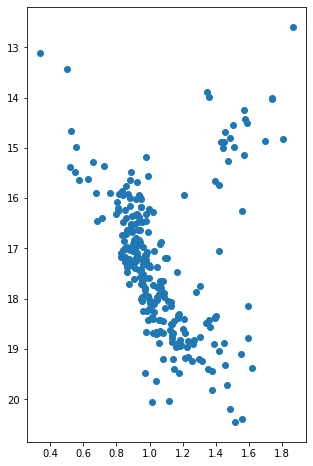

In [22]:
subset = ndf[ndf['pmra'].isin(xin) & ndf['pmdec'].isin(yin)]

plt.figure(figsize=(5,8))
plt.scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
plt.gca().invert_yaxis()

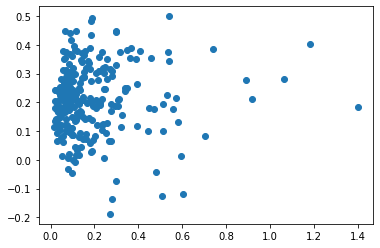

In [23]:
plt.scatter(subset['parallax_error'],subset['parallax'])